In [400]:
# Terminal / Anaconda Navigator: conda install -c conda-forge gensim
import pickle
from gensim import matutils, models
import scipy.sparse
import pandas as pd
from gensim.models import CoherenceModel

In [470]:
f_data = pd.read_csv('../data/cleaned_tweets.csv')
f_data.head(3)

,Datetime,Tweet Id,Text,Username,Text_Cleaned,tokens,tokens_text
0,2021-10-27 23:59:51+00:00,1453511793758797828,@WuBlockchain #BlockchainNative #Metaverse #NF...,Cranehehe1,because they donlearn the second law of hacker...,"['donlearn', 'second', 'law', 'hacker']",donlearn second law hacker
1,2021-10-27 23:57:13+00:00,1453511131331534853,"Get in on this before tomorrow, #NFT #NFTCommm...",VinceBernal,get in on this before tomorrow,"['get', 'tomorrow']",get tomorrow
2,2021-10-27 23:56:51+00:00,1453511038348009476,@metamonstersnft Get in on this before tomorro...,VinceBernal,get in on this before tomorrow,"['get', 'tomorrow']",get tomorrow


In [471]:
f_data.rename(columns = {'Text':'OriginalText', 'Text_Cleaned':'Text'}, inplace = True)

In [472]:
f_data = f_data.loc[f_data['Datetime'] >= '2022-05-08']

In [473]:
f_data = f_data.loc[f_data['Datetime'] <= '2022-05-11']

In [474]:
f_data

,Datetime,Tweet Id,OriginalText,Username,Text,tokens,tokens_text
157161,2022-05-08 23:59:39+00:00,1523452603904172032,Destrucción creativa del capitalismo trabajand...,MaximilianLex4,destrucción creativa del capitalismo trabajand...,"['destruccion', 'creativa', 'del', 'capitalism...",destruccion creativa del capitalismo trabajand...
157162,2022-05-08 23:59:33+00:00,1523452578452836354,@ZssBecker That’s exactly what $Kainet is doin...,CKadatz,thatexactly what kainet is doing building thei...,"['thatexactly', 'kainet', 'building', 'land', ...",thatexactly kainet building land kai community...
157163,2022-05-08 23:59:24+00:00,1523452538401353728,@METAHORSEOFFIC1 It's is unique way to breed!!...,DensLikesDance,itis unique way to breed amazing,"['itis', 'unique', 'way', 'breed', 'amazing']",itis unique way breed amazing
157164,2022-05-08 23:59:16+00:00,1523452505622913024,🌍Eco Shiba Fighter´s \n\n🏷 0.0025 $ETH (♻Poly...,ShibaAr28190159,eco shiba eth polygon no gas fee drop coll...,"['eco', 'shiba', 'polygon', 'gas', 'fee', 'dro...",eco shiba polygon gas fee drop collection letc...
157165,2022-05-08 23:59:03+00:00,1523452450908565505,Creative destruction of capitalism working ful...,MaximilianLex4,creative destruction of capitalism working ful...,"['creative', 'destruction', 'capitalism', 'wor...",creative destruction capitalism working full f...
...,...,...,...,...,...,...,...
159669,2022-05-10 20:35:43+00:00,1524126054859821056,Going to tell my grandkids that I was there th...,SpottingWaldo,going to tell my grandkids thatwas there that ...,"['going', 'tell', 'grandkids', 'thatwas', 'day...",going tell grandkids thatwas day took first steps
159670,2022-05-10 20:35:41+00:00,1524126050334265345,Some creators are asking about how they will g...,shayfu,some creators are asking about how they will g...,"['creators', 'asking', 'get', 'paid', 'check',...",creators asking get paid check video zuck
159671,2022-05-10 20:35:33+00:00,1524126016473468928,Yesterday's 10:10 TILTED TILT #2 (05-09-22) Th...,Tilted_Hawaiian,tilted tilt the tijuana street rapper,"['tilted', 'tilted', 'tijuana', 'street', 'rap...",tilted tilted tijuana street rapper
159672,2022-05-10 20:35:33+00:00,1524126012824563713,@BTC_Archive . .game is developed on the unrea...,hayal_bohcasi,game is developed on the unreal engine it is a...,"['game', 'developed', 'unreal', 'anticipated',...",game developed unreal anticipated launch mid may


In [475]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

# Vedi pickle
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(f_data.Text)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = f_data.index

In [476]:
# One of the required inputs is a term-document matrix
tdm = data_dtm.transpose()
tdm.head()

,157161,157162,157163,157164,157165,157166,157167,157168,157169,157170,...,159664,159665,159666,159667,159668,159669,159670,159671,159672,159673
aaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaamanın,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abcof,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abd,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abilities,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [477]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(data_dtm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [478]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
cv = pickle.load(open("../data/cv_stop.pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

/usr/local/lib/python3.9/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.18.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [479]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=1)
lda.print_topics()

[(0,
  '0.002*"bent" + 0.002*"cowardly" + 0.002*"conscious" + 0.002*"eww" + 0.002*"arri" + 0.002*"conventions" + 0.002*"cricket" + 0.002*"birth" + 0.002*"bamboozled" + 0.002*"boba"'),
 (1,
  '0.004*"feminists" + 0.003*"dear" + 0.002*"electric" + 0.002*"discouraging" + 0.002*"act" + 0.002*"beef" + 0.002*"bones" + 0.002*"dissolve" + 0.002*"apple" + 0.002*"dinner"')]

In [480]:
# Let's create a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)]
    return ' '.join(all_nouns)

In [481]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns = pd.DataFrame(f_data.Text.apply(nouns))
data_nouns

,Text
157161,destrucción creativa del capitalismo trabajand...
157162,kainet metaverse land kai community build bear...
157163,itis way
157164,eco shiba gas fee drop collection eco friends
157165,destruction capitalism force fronts world fasc...
...,...
159669,grandkids day steps
159670,creators check video zuck
159671,street rapper
159672,game engine mid


In [482]:
# Create a new document-term matrix using only nouns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said','game','discord','tweet','twitter'
                  'retweet','check','play','join','world','thing','coinnews']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.Text)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_nouns.index
data_dtmn

,aaa,aaamanın,abcof,abd,ability,ablity,abouthost,abrash,absolute,abstract,...,𝗠𝗲𝘁𝗮𝗛𝗤,𝗦𝗮𝗻𝗱𝗯𝗼𝘅,𝗧𝗵𝗲,𝗩𝗶𝗿𝘁𝘂𝗮𝗹,𝗯𝗲𝗰𝗼𝗺𝗶𝗻𝗴,𝗶𝘀,𝗶𝘁𝘀,𝗼𝗻,𝘁𝗵𝗲,𝘄𝗶𝘁𝗵
157161,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
157162,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
157163,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
157164,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
157165,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159669,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
159670,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
159671,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
159672,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [483]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [484]:
# Let's try topics = 3
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=1)
ldan.print_topics()

[(0,
  '0.010*"metaverse" + 0.008*"project" + 0.008*"tfuel" + 0.007*"collection" + 0.007*"nft" + 0.006*"today" + 0.005*"amp" + 0.005*"theta" + 0.004*"opensea" + 0.004*"future"'),
 (1,
  '0.013*"metaverse" + 0.006*"amp" + 0.006*"nfts" + 0.005*"crypto" + 0.004*"day" + 0.004*"future" + 0.004*"avatar" + 0.004*"answers" + 0.004*"market" + 0.004*"games"')]

In [485]:
# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)]
    return ' '.join(nouns_adj)

In [486]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns_adj = pd.DataFrame(f_data.Text.apply(nouns_adj))
data_nouns_adj

,Text
157161,destrucción creativa del capitalismo trabajand...
157162,kainet metaverse land kai community stronger b...
157163,itis unique way
157164,eco shiba gas fee drop collection letcollect e...
157165,creative destruction capitalism full force fro...
...,...
159669,grandkids day first steps
159670,creators check video zuck
159671,tijuana street rapper
159672,game unreal engine mid


In [487]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvna = cvna.fit_transform(data_nouns_adj.Text)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna

,aaa,aaamanın,abcof,abd,ability,able,ablity,abouthost,aboutuhut,abrash,...,𝗠𝗲𝘁𝗮𝗛𝗤,𝗦𝗮𝗻𝗱𝗯𝗼𝘅,𝗧𝗵𝗲,𝗩𝗶𝗿𝘁𝘂𝗮𝗹,𝗯𝗲𝗰𝗼𝗺𝗶𝗻𝗴,𝗶𝘀,𝗶𝘁𝘀,𝗼𝗻,𝘁𝗵𝗲,𝘄𝗶𝘁𝗵
157161,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
157162,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
157163,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
157164,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
157165,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159669,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
159670,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
159671,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
159672,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [488]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [489]:
# Let's try 3 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.017*"metaverse" + 0.014*"amp" + 0.006*"que" + 0.006*"great" + 0.005*"answers" + 0.005*"stocks" + 0.005*"catboy" + 0.005*"hashtag" + 0.005*"future" + 0.004*"crypto"'),
 (1,
  '0.019*"metaverse" + 0.009*"nfts" + 0.008*"cool" + 0.008*"avatar" + 0.007*"platform" + 0.007*"life" + 0.007*"crypto" + 0.005*"digital" + 0.005*"community" + 0.005*"second"'),
 (2,
  '0.025*"nft" + 0.016*"project" + 0.009*"team" + 0.008*"opensea" + 0.007*"new" + 0.007*"future" + 0.006*"opportunity" + 0.006*"บาท" + 0.005*"hey" + 0.005*"welcome"'),
 (3,
  '0.015*"tfuel" + 0.011*"ubxs" + 0.009*"theta" + 0.009*"token" + 0.008*"nft" + 0.008*"tdrop" + 0.007*"metaverse" + 0.007*"collection" + 0.006*"real" + 0.006*"sticker"')]

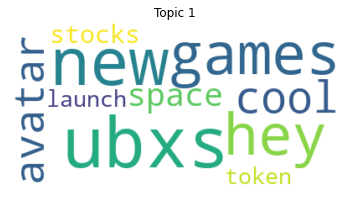

In [443]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
def create_wordcloud(model, topic):
    text = {word: value for word, value in model.show_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic" + " "+ str(topic))
    plt.show()
create_wordcloud(ldana,1)

In [186]:
from gensim import corpora
word2id = dict((k, v) for k, v in cvna.vocabulary_.items())
d = corpora.Dictionary()
d.id2token = id2word
d.token2id = word2id

In [187]:
#import pyLDAvis
# Visualize the topics
#pyLDAvis.enable_notebook()
#LDAvis_prepared = pyLDAvis..prepare(ldana, corpusna, d)
#LDAvis_prepared

In [188]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    lda_model = models.LdaMulticore(corpus=corpus, num_topics=k, id2word=dictionary, passes=10,alpha=a,
                                           eta=b)
    coherence_model_lda = CoherenceModel(model=lda_model, corpus=corpus,dictionary=dictionary, coherence='u_mass')
    return coherence_model_lda.get_coherence()

In [189]:
#compute_coherence_values(corpusna,d,2,0.1,0.4)

In [190]:
import numpy as np
from gensim import models
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 2
max_topics = 10
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
model_results = {
                 'Topics': [],
                 'Coherence': []
                }

# Can take a long time to run
if 1 == 1:
        # iterate through number of topics
    for k in topics_range:
                    # get the coherence score for the given parameters
            print(k)
            cv = compute_coherence_values(corpus=corpusna, dictionary=d,
                                                  k=k, a=0.5, b=0.5)
                    # Save the model results
            model_results['Topics'].append(k)
            model_results['Coherence'].append(cv)

2
3
4
5
6
7
8
9


In [191]:
model_results

{'Topics': [2, 3, 4, 5, 6, 7, 8, 9],
 'Coherence': [-13.71043589463403,
  -15.260806662577536,
  -14.777933657484777,
  -15.442436240375816,
  -15.809451086260772,
  -16.550888553900727,
  -16.24732307039631,
  -16.312461579270646]}

In [192]:
results = pd.DataFrame(model_results)

In [193]:
grouped = (results.groupby(['Topics'], as_index=False)).mean()

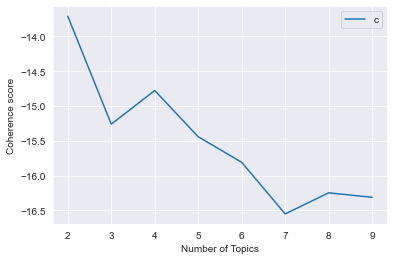

In [194]:
#Plot multidimensionale?
Limport matplotlib.pyplot as plt
def plot_graph(model_results):
    plt.plot(grouped['Topics'], grouped['Coherence'])
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

plot_graph(model_results)

In [195]:
results.to_csv("../data/resultsLDA062022.csv",index=False)